## 채소류 실적 대이터 
    

In [4]:
install.packages("languageserver")



The downloaded binary packages are in
	/var/folders/j9/cyqwg1g57ts8dmlvdn5rdyhw0000gn/T//RtmpF1JU75/downloaded_packages


In [122]:
#-------------------------------------------------------------------------------------------------------------------- # nolint
## Descrition : Library 설치및 기본 세팅 셀
## Auhtor : Forrest Park
## Update :
    #2024.04.12 Sat
        # 1. RandomForrest model 함수 추가
    #2024.04.13 Sun
        # 1. data Fetch 함수화
#--------------------------------------------------------------------------------------------------------------------
## Basic Settings
    
   
    options(warn = -1) ## 경고 지우기
    options(repr.plot.width=8, repr.plot.height=6) # 플랏 크기 조절
    Sys.setlocale(category = "LC_ALL", locale = "ko_KR.UTF-8") # 한글 설정

# Basic Graph Google Font Setting
    library(showtext) ## plot : 구글 폰트 사용 
    font_add_google(name = "Noto Serif KR",family = "noto-serif")
    showtext_auto(TRUE)
# Libraries for data fetching
    library(jsonlite) # JSON file fetch
    # fromJSON("") #: json file fetch
    library(XML) # XML file fetch
    # xmlToDataFrame("")
    library(readxl) # excel file fetch
    # read_excel("", sheet =2)
    library(data.table)
    # tidyverse 
    library(tidyverse)

## Data Fetch (csv)
    dataFetch_csv <- function(csvfile_address){
        ## Descrition : Data fetch function for csv file 
        ## Auhtor : Forrest Park
        ## Update :
        #2024.04.13 Sun
            # 1. 
        ## CSV filez
        return(read.csv(csvfile_address,na.strings=NA, header = T, sep=",",encoding = "UTF-8",fileEncoding="EUC-KR")) 
    }

## Data Fetch (txt)
    dataFetch_txt <- function(txtfile_address){
        ## Descrition : Data fetch function for txt file 
        ## Auhtor : Forrest Park
        ## Update :
        #2024.04.13 Sun
            # 1. 
        return(readtable(txtfile_address, 
                encoding ="EUC-KR", fileEncoding ="UTF-8", 
                colnames =varnames,
                hearder =F, skip =0, nrows =-1, sep=""))
    }

## DataFetch ( xlsx)
    dataFetch_xlsx <-function(xlsxfile_address){
        ## Descrition : xlsx 파일에서 데이터 읽기
        ## Auhtor : Forrest Park
        ## Update :
            #2024.04.13 Sun
                # 1. 
        return(read_excel(xlsxfile_address))
    } 
## 함수 정리 

## 기본함수 : data, str, length, ncol, nrow, dim, ls, head, tail, library, 
    # data<- c(1,2,3)
    # label = c('a','b','c')
    # names(data)<-label
    
    # matrix( data, nrow= 2, ncol=3 , byrow=T)
    # array(data, dim = c(2,3))
    # list(data, "hello")
    # factor(data, labels= label)

## 기본 통계량 mean, median, min, max, range, sd, hist, barplot, stem, var
    # range(data) #: data 의 최대 최소 출력
    # var(data)  #: data 의 분산값 출력
    # quantile(data, probs = 0.25) # :  사분위 수 출력 함수 

## 데이터 처리 : apply, sapply, lapply 

## 데이터 시각화
    # stem(col, scale =1)
    # hist(data) # : data 의 histogram(연속 분포함수 ) 
    # barplot(data, ylim =c(0:10), main= "title", xlab="x label", ylab="y label", names =colnames(data)), 


## Libraries for DATA
    library(stringr) # stringr 불러오기
    library(dplyr) # dplyr : 데이터 가공 함수 -> 
    # filter(data,  a>1) : 특정 row 추출
    # select(data, a, b) : 특정 column 추출
    # arrange(data, desc(a))
    # mutate(data, a_rank =rank(a)) # a칼럼 값을 기준으로 rank 를 매겨 새로운 랭크 칼럼을 생성
    # distinct(data, a,b) # data 의 a, b 칼럼을 기준으로 중복된 행을 제거 (a와 b 가 동시에 중복)
    # summarise(data, a_mean = mean(a), a_min= min(a), a_sd = sd(a) .. func(a)) # a 칼럼의 평균, 등등의 함수 값 요약. 

    library(descr) # descr : 데이터 설명 함수 
    # freq(data, plot =F, main ="title") # : data row 별 빈도수 
    library(psych) # psych : 데이터 시각화 함수 pairs.panel(iris)
    # kurtosi(data) #: data 의 첨도값 출력 / psych 
    # skew(data) #: data 의 왜도값 출력 /psysy


    library(reshape2) # data layout 변환 
    library(ggplot2) # 그래프 
    library(plotrix) # 3D pie
    library(RColorBrewer) # color package
    library(tidyverse)
    library(hrbrthemes)
    library(kableExtra)

    library(caret) # data sampling 
    library(randomForest) # prediction model 
    library(nnet)


#library(extrafont)
# Functions 
dataDescription <- function(data){
    columns <-c()
    cat("\n\n *** 칼럼 별 데이터 빈도 조사 ***\n\nData Columns :  ",ncol(data),"개","\n\n\n")
    for( i in 1:ncol(data)){
        cat(" ",i ,". ", colnames(data)[i],"\n", sep = "")
        columnDesc(data[colnames(data)[i]])
        columns<- append(columns,colnames(data)[i])
    }
    return(columns)
}

columnDesc<- function(column){

    ## Descrition : 칼럼 데이터 설명 
    ## Auhtor : Forrest Park
    ## Update :
        #2024.04.13 Sun
            # 1. 
    par(bg = "white")
    # 시장이름의 개수
    cat( "\n ***[",names(column), "]칼럼의 데이터 종류 개수:",nrow(unique(column)), sep = "")
    # 가장 빈도가 많은 데이터와 적은 데이터 각각 5개 
    dataFreq_top5<- head(arrange(as.data.frame(freq(as.matrix(column), plot =F)), desc(Frequency))[2:6,],5)
    dataFreq_bot5<-tail(arrange(as.data.frame(freq(as.matrix(column), plot =F)), desc(Frequency)),5)
    cat("\n\n-----[",names(column),"] 에서 가장 빈도가 많은 데이터 top 5 \n")
    print(dataFreq_top5)
    cat("\n\n-----[",names(column),"] 에서 가장 빈도가 적은 데이터 5 개 \n")
    print(dataFreq_bot5)

    cat("\n\n\n")

}

## 특정칼럼의 데이터를 모두 보고싶을 때 csv 로 변환하는 함수 

column_csvSaving <- function(column_vector,title){
    ##library(data.table)
    ##library(tidyverse)
    a_data<-as.data.frame(data.table(distinct(column_vector)))
    write_csv(a_data,paste(title,".csv",sep =""))
}


findWord_in_specific_colum <-function(data,찾을칼럼이름, 찾아야하는단어){
    ## Descrition : 특정칼럼에서 어떤단어를 포함하는 row 만 골라내기
    ## Auhtor : Forrest Park
    ## Update :
        #2024.04.13 Sun
            # 1. 
    col_num<-which(colnames(data)==찾을칼럼이름)
    selectedCol <- data[[찾을칼럼이름]] 
    data %>% filter(str_detect(selectedCol,'배추'))
}


row_kind_show<-function(data){
    ## Descrition : 각 칼럼에서의 값들이 어떤 것들이있는지 개수를 알려줌. 
    ## Auhtor : Forrest Park
    ## Update :
        #2024.04.13 Sun
            # 1. 
    cols <- colnames(data)
    for ( i in 1:length(cols)){
        cat(paste(cols[i],'의 중복되지않은 개수 : ',length(unique(data[[cols[i]]])) ,sep=""  ), "\n")
    }
}
#a %>% filter(VGETBL_CL=='수박')
# a_data<-as.data.frame(data.table(distinct(채소생산['VGETBL_CL'])))
# write_csv(a_data,"a_data.csv")



[1] "ko_KR.UTF-8/ko_KR.UTF-8/ko_KR.UTF-8/C/ko_KR.UTF-8/C"

## 채소생산실적 (2013,2014, 2016)
    - 배추전체 데이터 정제
    - 데이터 출처 : 채소류생산실적 (https://data.mafra.go.kr/opendata/data/indexOpenDataDetail.do?data_id=20220216000000001975)
    

In [104]:

findWord_in_specific_colum <-function(data,찾을칼럼이름, 찾아야하는단어){
    col_num<-which(colnames(data)==찾을칼럼이름)
    selectedCol <- data[[찾을칼럼이름]] 
    data %>% filter(str_detect(selectedCol,'배추'))
}
채소생산<-dataFetch_xlsx("vegitable_result.xlsx")
colnames(채소생산)<-c('연도','순서','지역','종류','이름','총면적','총단수','총생산량','노지면적','노지단수','노지생산량','시설면적','시설단수','시설생산량')
#배추전체<-채소생산 %>% filter(str_detect(이름,'배추전체'))
배추전체<-findWord_in_specific_colum(채소생산,'이름','배추전체');


연도
<chr>
2013
2016
2014


## GAP 인증 농가 현황 (2022년)

In [124]:
## file read
인증농가현황_2022<-dataFetch_csv("../Data/농림축산식품부+국립농산물품질관리원_농산물우수관리(GAP)+인증농가+현황_20220324.csv")




In [125]:

row_kind_show(인증농가현황_2022)

인증번호의 중복되지않은 개수 : 11410 
소재지의 중복되지않은 개수 : 215 
품목의 중복되지않은 개수 : 430 
재배면적.제곱미터.의 중복되지않은 개수 : 32192 
생산계획량.톤.의 중복되지않은 개수 : 19232 


In [253]:
# 인증농가현황_2022 %>%filter(품목 =='배추')
a <- findWord_in_specific_colum(인증농가현황_2022, "품목", "배추")

## 특정 칼럼에서 중복되지 않은 값들을 백터로 반환하기

unique_row_extract <- function(data,col_name) {
    ## Descrition : 특정칼럼에서 중복되지 않은 값 추출
    ## Auhtor : Forrest Park
    ## Update :
        #2024.04.13 Sun
            # 1. 
    col_num <- which(colnames(data) == col_name)

    result <-unique(data[[colnames(data)[col_num]]])
    options(repr.plot.width=18, repr.plot.height=6) # 플랏 크기 조절

    par(bg='white')
    #freq(data[[colnames(data)[col_num]]],ylab= paste(col_name,'개수'))
    freq_data<-as.data.frame(freq(data[[colnames(data)[col_num]]],plot = F))
    a<-(freq(data[[colnames(data)[col_num]]],plot = F))
  

    colnames(freq_data)<- c("freq","percent")
    cat( "<<<", col_name, "에 있는 항목의 종류 와 빈도 >>>\n")
    result<-(arrange(freq_data,desc(freq)))
    print(result)
    # for ( i in 1:nrow(result)){
    #     cat(paste("  ",i, ". ",result[i,1],sep=""),"\n")
    # }
}
unique_row_extract(a,'품목')


<<< 품목 에 있는 항목의 종류 와 빈도 >>>
                       freq      percent
Total                  4823 100.00000000
배추                   1690  35.04043127
브로코리(녹색꽃양배추)  847  17.56168360
양배추                  831  17.22993987
고냉지배추              546  11.32075472
방울양배추              345   7.15322413
얼갈이배추              317   6.57267261
쌈배추                  122   2.52954593
김장(가을)배추           72   1.49284678
배추(기타)               28   0.58055152
양배추(기타)             18   0.37321169
적양배추                  6   0.12440390
콜라비(순무양배추)        1   0.02073398


In [264]:
## 인증농가현황_2022 중에서 품목이 배추인 데이터 
배추<-subset(a,a$품목 == '배추')
colnames(배추)<-c('인증번호','소재지','품목','재배면적_미터','생산계획량_톤')
rownames(배추)<-c()
head(배추)
## 배추농가에서 소재지 빈도
unique_row_extract(배추,'소재지')

,인증번호,소재지,품목,재배면적_미터,생산계획량_톤
,<int>,<chr>,<chr>,<dbl>,<dbl>
1,1005737,충청북도 괴산군,배추,2453,6
2,1005737,충청북도 괴산군,배추,3337,8
3,1005737,충청북도 괴산군,배추,2453,15
4,1005737,충청북도 괴산군,배추,4380,30
5,1005737,충청북도 괴산군,배추,3337,30
6,1005737,충청북도 괴산군,배추,6615,10


<<< 소재지 에 있는 항목의 종류 와 빈도 >>>
                     freq     percent
Total                1690 100.0000000
전라남도 해남군       521  30.8284024
경상북도 영덕군       322  19.0532544
전라북도 부안군       311  18.4023669
충청북도 충주시       113   6.6863905
전라남도 진도군       110   6.5088757
전라남도 강진군        69   4.0828402
경상남도 통영시        52   3.0769231
경기도 용인시 처인구   49   2.8994083
경상남도 김해시        45   2.6627219
충청북도 진천군        36   2.1301775
대전광역시 유성구      19   1.1242604
경상북도 영양군        16   0.9467456
전라북도 정읍시        12   0.7100592
충청북도 괴산군        12   0.7100592
경상북도 포항시 북구    3   0.1775148


In [266]:
배추소재지별총재배면적 <- arrange(aggregate(재배면적_미터 ~ 소재지, 배추, sum), desc(재배면적_미터)	)
배추소재지별총재배면적

소재지,재배면적_미터
<chr>,<dbl>
전라남도 해남군,866505.00
전라북도 부안군,712289.00
경상북도 영덕군,563421.00
충청북도 충주시,227589.00
전라남도 강진군,136587.00
전라남도 진도군,126572.90
경기도 용인시 처인구,82403.00
충청북도 진천군,73268.00
경상남도 김해시,44880.00


In [111]:
    result <- c()
for(i in 1:nrow(소재지별면적)) {
    result <- c(result,unlist(as.matrix((str_split(소재지별면적$소재지," ")))[i])[1])
}

In [149]:
result

[1] "강원도"         "강원도"         "강원도"         "강원도"        
  [5] "강원도"         "강원도"         "강원도"         "강원도"        
  [9] "강원도"         "강원도"         "강원도"         "강원도"        
 [13] "강원도"         "강원도"         "강원도"         "강원도"        
 [17] "강원도"         "강원도"         "경기도"         "경기도"        
 [21] "경기도"         "경기도"         "경기도"         "경기도"        
 [25] "경기도"         "경기도"         "경기도"         "경기도"        
 [29] "경기도"         "경기도"         "경기도"         "경기도"        
 [33] "경기도"         "경기도"         "경기도"         "경기도"        
 [37] "경기도"         "경기도"         "경기도"         "경기도"        
 [41] "경기도"         "경기도"         "경기도"         "경기도"        
 [45] "경기도"         "경기도"         "경기도"         "경기도"        
 [49] "경기도"         "경기도"         "경기도"         "경기도"        
 [53] "경기도"         "경기도"         "경기도"         "경기도"        
 [57] "경기도"         "경기도"         "경기도"         "경상남도"      
 [61] "경상남도"       "경상남도"       "경상남도"       "경상남도"      
 [65] "경상남도"       "경상남도"       "경상남도"       "경상남도"      
 [69] "경상남도"       "경상남도"       "경상남도"       "경상남도"      
 [73] "경상남도"       "경상남도"       "경상남도"       "경상남도"      
 [77] "경상남도"       "경상남도"       "경상남도"       "경상남도"      
 [81] "경상남도"       "경상북도"       "경상북도"       "경상북도"      
 [85] "경상북도"       "경상북도"       "경상북도"       "경상북도"      
 [89] "경상북도"       "경상북도"       "경상북도"       "경상북도"      
 [93] "경상북도"       "경상북도"       "경상북도"       "경상북도"      
 [97] "경상북도"       "경상북도"       "경상북도"       "경상북도"      
[101] "경상북도"       "경상북도"       "경상북도"       "경상북도"      
[105] "광주광역시"     "광주광역시"     "광주광역시"     "광주광역시"    
[109] "광주광역시"     "대구광역시"     "대구광역시"     "대구광역시"    
[113] "대구광역시"     "대구광역시"     "대구광역시"     "대구광역시"    
[117] "대전광역시"     "대전광역시"     "대전광역시"     "대전광역시"    
[121] "대전광역시"     "부산광역시"     "부산광역시"     "부산광역시"    
[125] "부산광역시"     "부산광역시"     "부산광역시"     "서울특별시"    
[129] "서울특별시"     "서울특별시"     "서울특별시"     "서울특별시"    
[133] "서울특별시"     "서울특별시"     "서울특별시"     "서울특별시"    
[137] "세종특별자치시" "울산광역시"     "울산광역시"     "울산광역시"    
[141] "인천광역시"     "인천광역시"     "인천광역시"     "인천광역시"    
[145] "인천광역시"     "인천광역시"     "전라남도"       "전라남도"      
[149] "전라남도"       "전라남도"       "전라남도"       "전라남도"      
[153] "전라남도"       "전라남도"       "전라남도"       "전라남도"      
[157] "전라남도"       "전라남도"       "전라남도"       "전라남도"      
[161] "전라남도"       "전라남도"       "전라남도"       "전라남도"      
[165] "전라남도"       "전라남도"       "전라남도"       "전라남도"      
[169] "전라북도"       "전라북도"       "전라북도"       "전라북도"      
[173] "전라북도"       "전라북도"       "전라북도"       "전라북도"      
[177] "전라북도"       "전라북도"       "전라북도"       "전라북도"      
[181] "전라북도"       "전라북도"       "전라북도"       "제주특별자치도"
[185] "제주특별자치도" "충청남도"       "충청남도"       "충청남도"      
[189] "충청남도"       "충청남도"       "충청남도"       "충청남도"      
[193] "충청남도"       "충청남도"       "충청남도"       "충청남도"      
[197] "충청남도"       "충청남도"       "충청남도"       "충청남도"      
[201] "충청남도"       "충청북도"       "충청북도"       "충청북도"      
[205] "충청북도"       "충청북도"       "충청북도"       "충청북도"      
[209] "충청북도"       "충청북도"       "충청북도"       "충청북도"      
[213] "충청북도"       "충청북도"       "충청북도"

In [170]:
aggregate(재배면적.제곱미터. ~ 소재지, 배추, sum)$소재지

[1] "경기도 용인시 처인구" "경상남도 김해시"      "경상남도 통영시"     
 [4] "경상북도 영덕군"      "경상북도 영양군"      "경상북도 포항시 북구"
 [7] "대전광역시 유성구"    "전라남도 강진군"      "전라남도 진도군"     
[10] "전라남도 해남군"      "전라북도 부안군"      "전라북도 정읍시"     
[13] "충청북도 괴산군"      "충청북도 진천군"      "충청북도 충주시"

In [153]:
b <- read.csv("../농림축산식품부+국립농산물품질관리원+농산물우수관리(GAP)+인증농가+현황_20240318.csv", fileEncoding ="EUC-KR")

In [321]:
subset(b,b$품목 == '배추')

,인증번호,소재지,품목,재배면적...,생산계획량.톤.
,<int>,<chr>,<chr>,<dbl>,<dbl>
282749,1009653,전라남도 진도군,배추,578.0,5.08
282750,1009653,전라남도 진도군,배추,725.0,6.37
282751,1009653,전라남도 진도군,배추,1959.0,17.22
282752,1009653,전라남도 진도군,배추,204.0,1.79
282753,1009653,전라남도 진도군,배추,2354.0,20.69
282754,1009653,전라남도 진도군,배추,3127.7,27.49
282755,1009653,전라남도 진도군,배추,1015.0,8.92
282756,1009653,전라남도 진도군,배추,1470.0,12.92
282757,1009653,전라남도 진도군,배추,1530.0,13.45


In [300]:
소재지배추재배면적 <- subset(b,b$품목 == '배추')

In [288]:
시도별배추생산량2024<-read.csv("../채소생산량_엽채류__20240412163507.csv", header=T,skip=1)

In [305]:
table(소재지배추재배면적$소재지)


 강원특별자치도 영월군  강원특별자치도 평창군 경기도 고양시 일산서구 
                    96                      3                    111 
         경기도 광명시          경기도 부천시   경기도 안산시 상록구 
                    80                      1                      5 
  경기도 용인시 처인구        경상북도 경주시        경상북도 영덕군 
                    73                     45                    111 
       경상북도 영양군   경상북도 포항시 북구      대전광역시 유성구 
                     8                     72                     49 
       전라남도 강진군        전라남도 곡성군        전라남도 구례군 
                    48                     26                     14 
       전라남도 나주시        전라남도 진도군        전라남도 해남군 
                    44                    139                   1305 
 전북특별자치도 김제시  전북특별자치도 익산시        충청남도 부여군 
                    34                     11                     16 
       충청북도 제천시        충청북도 진천군        충청북도 충주시 
                     6                    112                    113 

In [291]:
head(시도별배추생산량2024)
head(소재지배추재배면적)

,시도별,노지배추.면적..ha.,노지배추.10a당.생산량..kg.,노지배추.생산량..톤.
,<chr>,<int>,<int>,<int>
1,서울특별시,7,7446,533
2,부산광역시,36,5803,2099
3,대구광역시,59,8684,5083
4,인천광역시,110,10463,11536
5,광주광역시,28,10998,3050
6,대전광역시,49,9606,4719


,인증번호,소재지,품목,재배면적...,생산계획량.톤.
,<int>,<chr>,<chr>,<dbl>,<dbl>
282749,1009653,전라남도 진도군,배추,578.0,5.08
282750,1009653,전라남도 진도군,배추,725.0,6.37
282751,1009653,전라남도 진도군,배추,1959.0,17.22
282752,1009653,전라남도 진도군,배추,204.0,1.79
282753,1009653,전라남도 진도군,배추,2354.0,20.69
282754,1009653,전라남도 진도군,배추,3127.7,27.49


In [296]:
colnames_소재지<-str_split_i(소재지배추재배면적$소재지," ",1);
# 소재지배추재배면적$시도 <- colnames_소재지

In [306]:
시도별배추생산량2024$시도별 <- c('서울특별시','부산광역시','대구광역시','인천광역시','광주광역시','대전광역시','울산광역시','세종특별자치시','경기도','강원특별자치도','충청북도','충청남도','전북특별자치도','전라남도','경상북도','경상남도','제주도')

In [307]:
시도별배추생산량2024

시도별,노지배추.면적..ha.,노지배추.10a당.생산량..kg.,노지배추.생산량..톤.
<chr>,<int>,<int>,<int>
서울특별시,7,7446,533
부산광역시,36,5803,2099
대구광역시,59,8684,5083
인천광역시,110,10463,11536
광주광역시,28,10998,3050
대전광역시,49,9606,4719
울산광역시,94,10248,9644
세종특별자치시,48,8659,4191
경기도,983,10309,101351


In [318]:
소재지배추재배면적$시도별 <- str_split_i(소재지배추재배면적$소재지, " ", 1)

In [319]:
for( i in 1:nrow(소재지배추재배면적)){
    for( j in 1:nrow(시도별배추생산량2024)){
        if(소재지배추재배면적$시도별[i] == 시도별배추생산량2024$시도별[j]){
            
            소재지배추재배면적$시도전체면적[i]  <- 시도별배추생산량2024[,2][j]
            소재지배추재배면적$시도전채생산량[i]  <- 시도별배추생산량2024[,4][j]
        }
    }
}

In [276]:
## gap 

colnames(소재지배추재배면적) <-c('소재지',	'재배면적(m^2)',	'시도별',	'시도전체면적(ha)',	'시도전채생산량(톤)')

In [326]:
소재지배추재배면적$소재지생산량 <- (소재지배추재배면적$재배면적... / (소재지배추재배면적$시도전체면적*10000)) * (소재지배추재배면적$시도전채생산량)

# 인증번호	소재지	품목	재배면적...(m^2)	생산계획량.톤.	시도별	시도전체면적(ha)	시도전채생산량(톤)	소재지생산량(톤)
colnames(소재지배추재배면적) <- c('인증번호','소재지','품목','재배면적(m^2)','생산계획량(톤)','시도별','시도전체면적(ha)','시도전채생산량(톤)','소재지생산량(톤)')

# 행 이름 정리
rownames(소재지배추재배면적) <- c()

In [382]:
unique(소재지배추재배면적$소재지)

[1] "전라남도 진도군"        "경기도 용인시 처인구"   "전라남도 해남군"       
 [4] "경상북도 영양군"        "충청북도 제천시"        "전라남도 나주시"       
 [7] "충청북도 충주시"        "전북특별자치도 익산시"  "경상북도 영덕군"       
[10] "충청남도 부여군"        "경기도 고양시 일산서구" "충청북도 진천군"       
[13] "경상북도 경주시"        "강원특별자치도 영월군"  "경상북도 포항시 북구"  
[16] "경기도 광명시"          "전라남도 곡성군"        "전라남도 강진군"       
[19] "강원특별자치도 평창군"  "전북특별자치도 김제시"  "전라남도 구례군"       
[22] "경기도 안산시 상록구"   "경기도 부천시"          "대전광역시 유성구"

In [378]:
소재지배추재배면적$위도 <- c(0)
소재지배추재배면적$경도 <- c(0)

inputlocalLatLng <- function(주소, 위도값, 경도값) {

    소재지배추재배면적$위도 <- ifelse(소재지배추재배면적$소재지 == 주소, 위도값, 소재지배추재배면적$위도)
    소재지배추재배면적$경도 <- ifelse(소재지배추재배면적$소재지 == 주소, 경도값, 소재지배추재배면적$경도)

    return(소재지배추재배면적)
}

In [393]:
## 소재지별 경도 위도 입력
# 소재지배추재배면적 <- inputlocalLatLng('충청남도 부여군', 36.2757637166445, 126.909772812745)
# 소재지배추재배면적 <- inputlocalLatLng('경기도 고양시 일산서구',37.6751982696279,126.750669084916)
# 소재지배추재배면적 <- inputlocalLatLng('강원특별자치도 영월군',37.1836860419285,128.461783934728)
# 소재지배추재배면적 <- inputlocalLatLng('경상북도 포항시 북구',36.0437417308541,129.368575852182)
# 소재지배추재배면적 <- inputlocalLatLng('경기도 광명시',37.4785674780314,126.864647815161)
# 소재지배추재배면적 <- inputlocalLatLng('전라남도 곡성군',35.2820258392354,127.291929639637)
# 소재지배추재배면적 <- inputlocalLatLng('전라남도 강진군',34.6420615268858,126.767213471898)
# 소재지배추재배면적 <- inputlocalLatLng('강원특별자치도 평창군',37.3707820404543,128.39016179013)
# 소재지배추재배면적 <- inputlocalLatLng('전북특별자치도 김제시',35.8035816671869,126.88064623757)
# 소재지배추재배면적 <- inputlocalLatLng('전라남도 구례군',35.202496361707,127.46270363657)
# 소재지배추재배면적 <- inputlocalLatLng('경기도 안산시 상록구',37.3009718344206,126.846482563885)
# 소재지배추재배면적 <- inputlocalLatLng('경기도 부천시',37.5035117792843,126.766038450927)
# 소재지배추재배면적 <- inputlocalLatLng('대전광역시 유성구',36.3622851114392,127.356257593324)
# 소재지배추재배면적 <- inputlocalLatLng('충청북도 충주시',36.9910490160221,127.925961035784)
# 소재지배추재배면적 <- inputlocalLatLng('충청북도 진천군',36.855378991826,127.435536085976)
# 소재지배추재배면적 <- inputlocalLatLng('경상북도 경주시',35.8562184605051,129.22478171309)

In [402]:

unique(filter(소재지배추재배면적,소재지배추재배면적$위도==0)$소재지)

character(0)

In [472]:
# 소재지배추재배면적

rfFunc <- function(data,target_col,rf_n,iter_n){
    Sys.setlocale(category = "LC_ALL", locale = "ko_KR.UTF-8") # 한글 설정
    target <- data[,target_col] # target 칼럼
    acc_rf <-c()
    acc_nn <-c()
    cat("예측률 \n")

    for(i in 1:iter_n){
        samp <- createDataPartition(data[,target_col], p =0.7, list =F)
        # 학습용, 검증용 분류
        data.tr     <- data[samp,]
        data.test   <- data[-samp,]
        # 문제 및 정답 만들기 
        x <- subset(data.test, select = -target_col)
        y <- data.test[,target_col]
        
        # 모델 생성
        target_name     <-colnames(data)[target_col] 
        Training_target <-data.frame(소재지생산량 =data.tr[,target_col])
        
        #model.nnet <- nnet(Training_target$V1 ~ ., data =data.tr, size = 3, trace =F) 

        rf <- randomForest(Training_target$소재지생산량 ~ ., data =data.tr, ntree =rf_n)
        # 예측
        
        pred_rf <-predict(rf,x )
        #pred_nn <-predict(model.nnet,x )
        acc_rf<-append(acc_rf,mean(pred_rf == y))
        acc_rf<-c(acc_rf,mean(pred_rf==y))
        #acc_nn<-append(acc_nn,mean(pred_nn == y))
        cat(mean(pred_rf ==y)," ")
        cat("\n")
    }
    cat(acc_rf)
    cat("\n\033[36m Random Forest 평균 예측률 : ",mean(acc_rf) ,"\033[0m",sep = "")
}
  # rfFunc(소재지배추재배면적,9,100,5)
#소재지배추재배면적


In [438]:

    target_col<-9
    Sys.setlocale(category = "LC_ALL", locale = "ko_KR.UTF-8") # 한글 설정
    target <- 소재지배추재배면적[, 9] # target 칼럼
    acc_rf <- c()
    acc_nn <- c()
    cat("예측률 \n")
    
    for(i in 1:5) {
        samp <- createDataPartition(소재지배추재배면적[, target_col], p = 0.7, list = FALSE)
        # 학습용, 검증용 분류
        data.tr <- 소재지배추재배면적[samp, ]
        data.test <- 소재지배추재배면적[-samp, ]
        # 문제 및 정답 만들기 
        x <- subset(data.test, select = -target_col)
        y <- data.test[, target_col]
        
        # 모델 생성
        target_name <- colnames(소재지배추재배면적)[target_col] 
        #print(target_name)
    
        # # 수정된 열 이름으로 변경
        Training_target <- data.frame(a = data.tr[, target_col])
        print(Training_target)
      
        rf <- randomForest(a ~., data = data.tr, ntree = rf_n)
    }
    
        # # 예측
        # pred_rf <- predict(rf, x)
        
        # acc_rf <- append(acc_rf, mean(pred_rf == y))
        # cat(mean(pred_rf == y), " ")




[1] "ko_KR.UTF-8/ko_KR.UTF-8/ko_KR.UTF-8/C/ko_KR.UTF-8/C"

예측률 
                a
1      6.70476271
2      8.40995323
3     22.72427361
4      2.36638684
5     36.28111821
6     11.77393452
7     17.05190516
8     17.74790129
9      9.51194710
10    25.28785935
11    23.19987097
12     9.27994839
13    22.61987419
14    12.17993226
15    11.13593806
16    32.75821781
17     2.05318858
18    35.39140316
19     1.73999032
20     0.70759606
21     3.24798194
22    22.29507600
23     8.85075077
24    42.82696181
25    14.18672110
26    14.36072013
27     9.74394581
28     6.84396194
29     6.72796258
30     2.31998710
31     8.80435103
32    10.77634006
33    13.03832748
34    11.50713600
35    11.50713600
36    11.50713600
37    19.77789000
38    12.70192935
39     9.92954477
40     5.89276723
41     7.63275755
42    42.80376194
43    20.20708761
44    28.33864239
45     2.99278335
46     1.94878916
47    18.00309987
48     3.02758316
49    18.06109955
50     8.21275432
51    10.90393935
52    14.26792065
53    22.58507439
54     2.26198742
55   

In [444]:
#rfFunc(소재지배추재배면적[-c(1,2,3,6)],5,100,5)
test<-소재지배추재배면적[-c(1,2,3,6)]
colnames(test)<-c('재배면적','생산계획량','시도전체면적','시도전채생산량','소재지생산량','위도','경도')
test

재배면적,생산계획량,시도전체면적,시도전채생산량,소재지생산량,위도,경도
<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>
578.0,5.08,3100,359598,6.7047627,34.48683,126.2634
725.0,6.37,3100,359598,8.4099532,34.48683,126.2634
1959.0,17.22,3100,359598,22.7242736,34.48683,126.2634
204.0,1.79,3100,359598,2.3663868,34.48683,126.2634
2354.0,20.69,3100,359598,27.3062481,34.48683,126.2634
3127.7,27.49,3100,359598,36.2811182,34.48683,126.2634
1015.0,8.92,3100,359598,11.7739345,34.48683,126.2634
1470.0,12.92,3100,359598,17.0519052,34.48683,126.2634
1530.0,13.45,3100,359598,17.7479013,34.48683,126.2634


In [473]:
rfFunc(test,5,100,5)


예측률 
0  
0  
0  
0  
0  
0 0 0 0 0 0 0 0 0 0
 Random Forest 평균 예측률 : 0

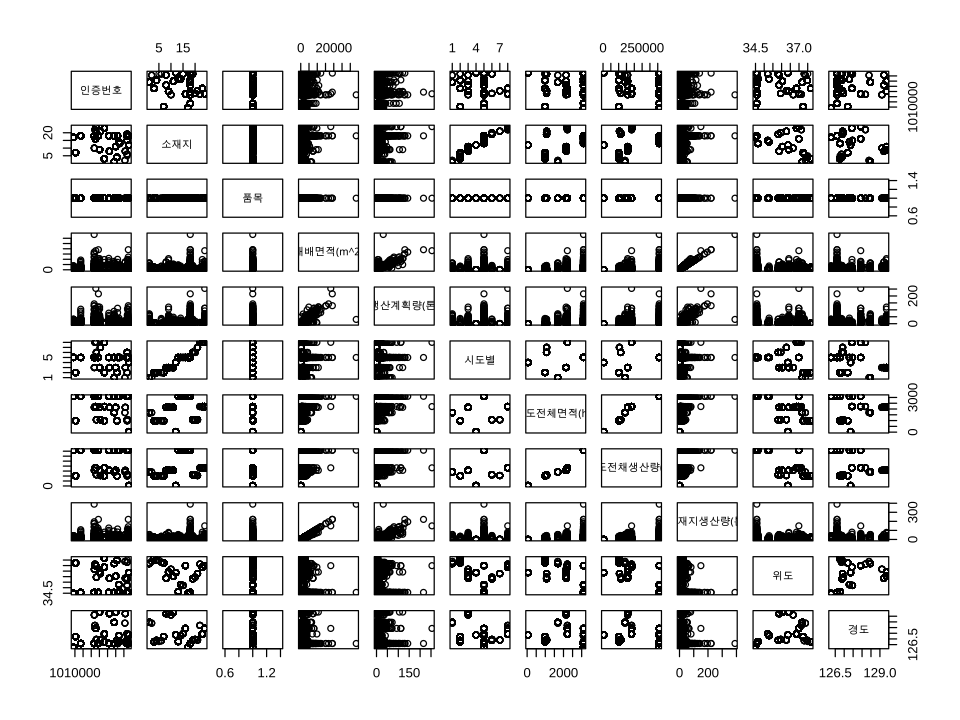

In [475]:
par(bg = 'white')
plot(소재지배추재배면적)

In [486]:
summary(lm(소재지생산량 ~ ., data = test))


Call:
lm(formula = 소재지생산량 ~ ., data = test)

Residuals:
    Min      1Q  Median      3Q     Max 
-37.931  -0.788  -0.131   0.754  16.327 

Coefficients:
                    Estimate    Std. Error t value             Pr(>|t|)    
(Intercept)    125.009132875  17.305245163   7.224   0.0000000000006672 ***
재배면적         0.011126329   0.000048386 229.949 < 0.0000000000000002 ***
생산계획량      -0.040154784   0.005176447  -7.757   0.0000000000000125 ***
시도전체면적    -0.005159309   0.000425157 -12.135 < 0.0000000000000002 ***
시도전채생산량   0.000046354   0.000003771  12.292 < 0.0000000000000002 ***
위도            -0.253925463   0.098801238  -2.570               0.0102 *  
경도            -0.912543324   0.132545203  -6.885   0.0000000000072836 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.52 on 2515 degrees of freedom
Multiple R-squared:  0.983,	Adjusted R-squared:  0.983 
F-statistic: 2.426e+04 on 6 and 2515 DF,  p-value: < 0.00000000000000022


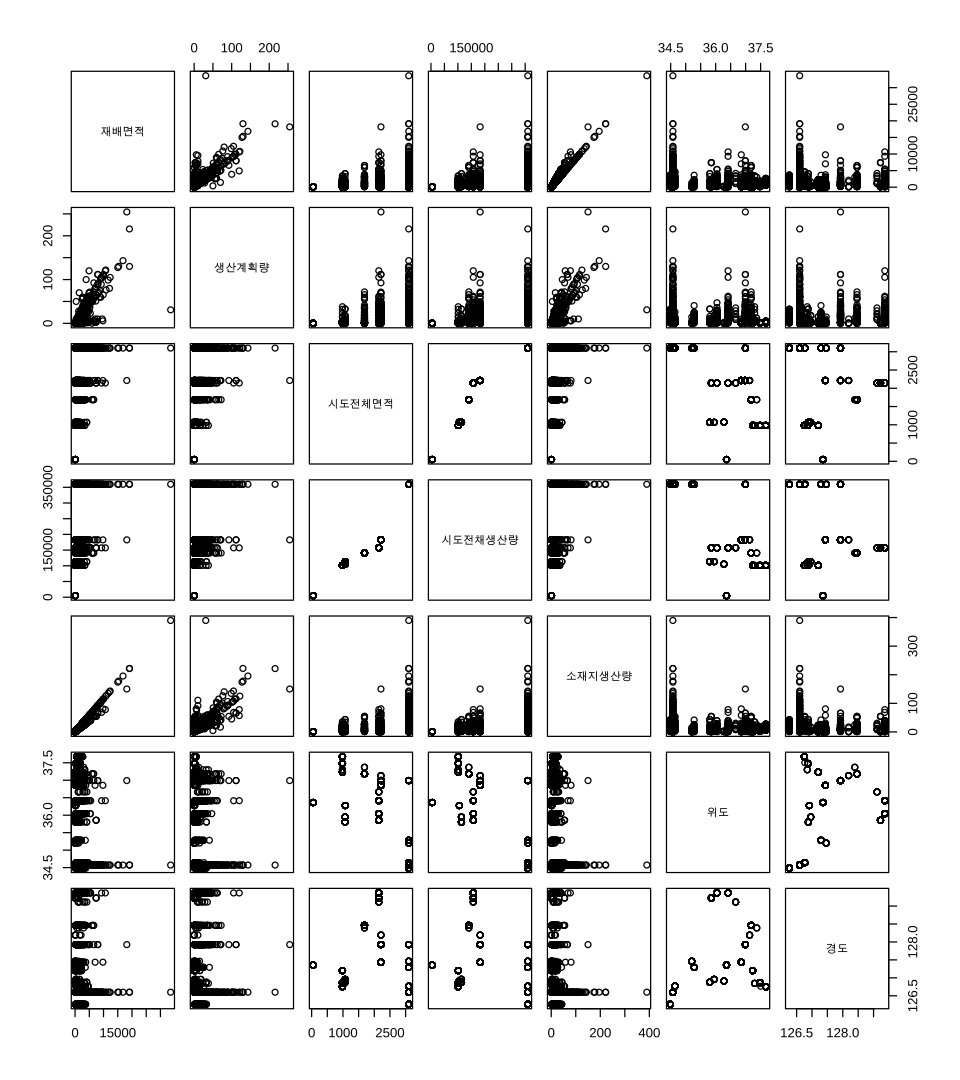

In [504]:
# install.packages('psysch')#
# library(psych)

options(repr.plot.widt =15, repr.plot.height =9)


par(bg='white')
pairs(test)